# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_push_v3


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

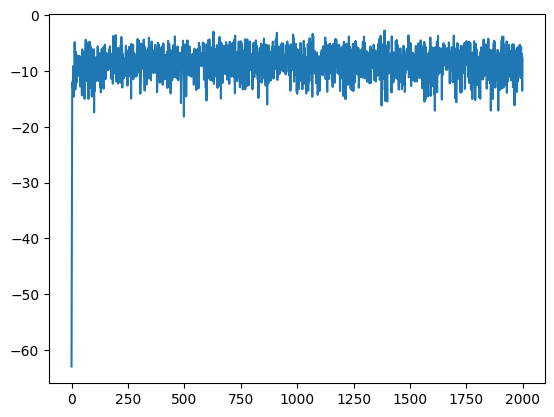

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[-62.9590908214225, -43.822039709463326, -23.475704114641967, -14.323069098809105, -11.989738580604369, -12.191235835977617, -13.062005346493914, -9.144934249641361, -11.577171615645748, -9.356099924599546, -14.594030720196097, -13.406090021217002, -12.048114254018827, -8.146653262583678, -4.8465563288976385, -8.35746075919358, -10.62740040755484, -13.323603840053629, -12.374203392767114, -9.260077896125518]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[-28.550894793414386, -25.262436448484543, -27.30663858122211, -45.86956084612429, -19.559261470808536, -13.920953767395975, -43.922342441952175, -32.92821052304745, -18.750244078337907, -29.179028431219052, -18.373331942378798, -37.37718156932081, -26.894282347940567, -45.498359555816535, -19.181980686208362, -23.153748160789814, -35.77567951732198, -18.800881389697444, -5.271996428796719, -25.370576885162123]


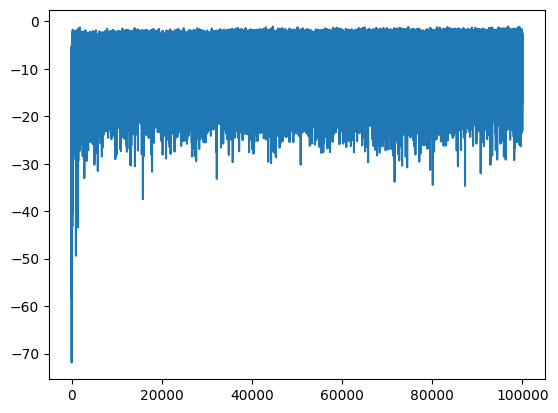

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

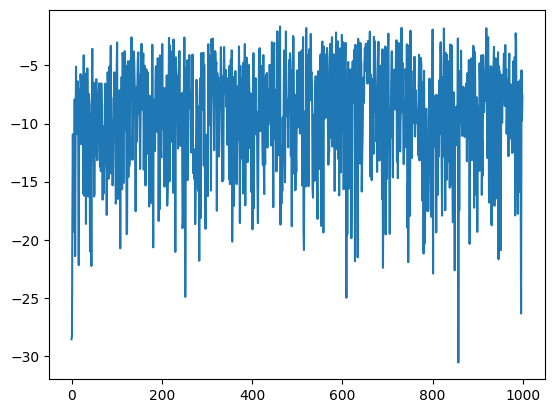

In [10]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

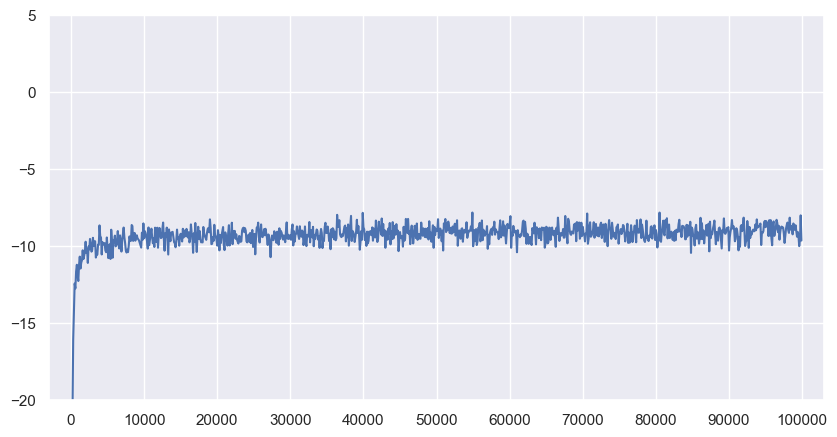

In [16]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-20,5)

plt.savefig("score_simple_push_v3.png")
plt.show()

In [12]:
score[1:101].mean()

0   -29.856781
dtype: float64